<a href="https://colab.research.google.com/github/osama629/finalproject/blob/main/myCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gunavenkatdoddi_eye_diseases_classification_path = kagglehub.dataset_download('gunavenkatdoddi/eye-diseases-classification')

print('Data source import complete.')


Data source import complete.


Found 844 validated image filenames belonging to 4 classes.

🔍 Loading model: DenseNet121


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


📊 Evaluating on test data...
DenseNet121 Accuracy (from evaluate): 0.9230, Loss: 0.2434
📈 Generating predictions and report...
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 305ms/step


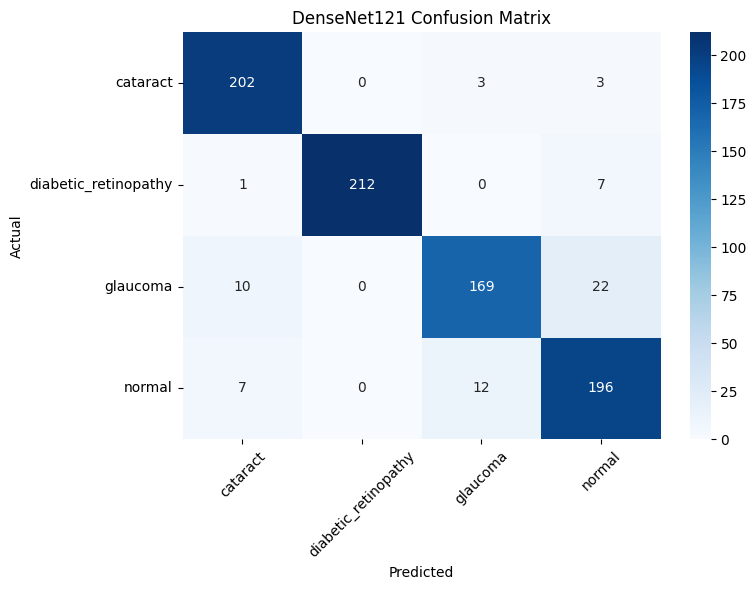

DenseNet121 Classification Report:
                      precision    recall  f1-score   support

            cataract       0.92      0.97      0.94       208
diabetic_retinopathy       1.00      0.96      0.98       220
            glaucoma       0.92      0.84      0.88       201
              normal       0.86      0.91      0.88       215

            accuracy                           0.92       844
           macro avg       0.92      0.92      0.92       844
        weighted avg       0.92      0.92      0.92       844


🔎 DenseNet121 - Overall Performance Metrics:
Accuracy:  0.9230
Precision: 0.9241
Recall:    0.9218
F1 Score:  0.9221

🔍 Loading model: ResNet50


📊 Evaluating on test data...
ResNet50 Accuracy (from evaluate): 0.8910, Loss: 0.3465
📈 Generating predictions and report...
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step


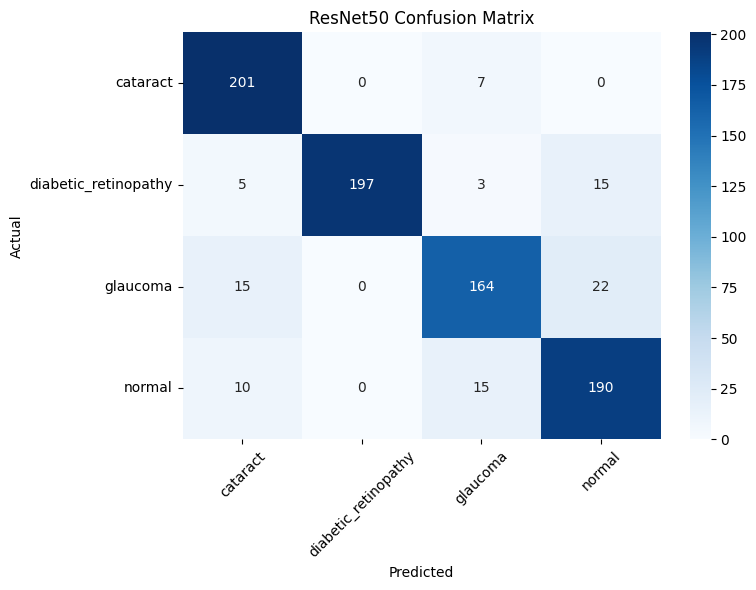

ResNet50 Classification Report:
                      precision    recall  f1-score   support

            cataract       0.87      0.97      0.92       208
diabetic_retinopathy       1.00      0.90      0.94       220
            glaucoma       0.87      0.82      0.84       201
              normal       0.84      0.88      0.86       215

            accuracy                           0.89       844
           macro avg       0.89      0.89      0.89       844
        weighted avg       0.89      0.89      0.89       844


🔎 ResNet50 - Overall Performance Metrics:
Accuracy:  0.8910
Precision: 0.8937
Recall:    0.8904
F1 Score:  0.8903

🔍 Loading model: VGG16


📊 Evaluating on test data...
VGG16 Accuracy (from evaluate): 0.8400, Loss: 0.4302
📈 Generating predictions and report...
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step


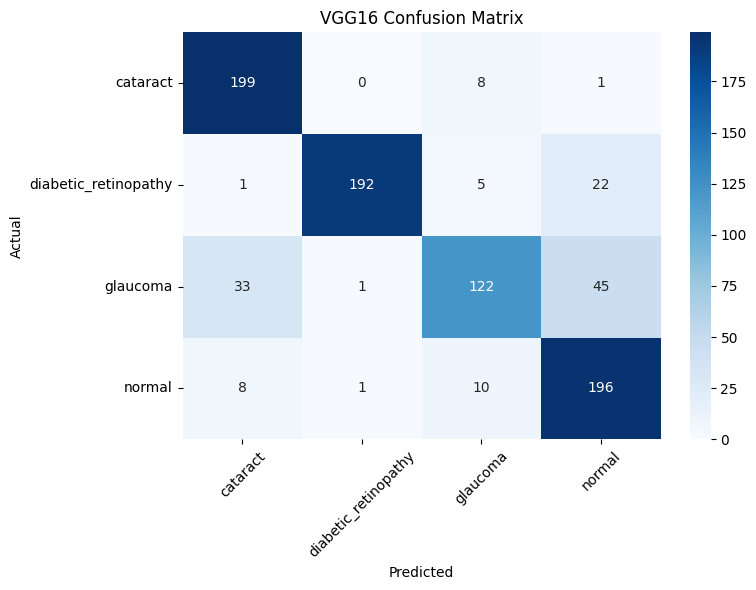

VGG16 Classification Report:
                      precision    recall  f1-score   support

            cataract       0.83      0.96      0.89       208
diabetic_retinopathy       0.99      0.87      0.93       220
            glaucoma       0.84      0.61      0.71       201
              normal       0.74      0.91      0.82       215

            accuracy                           0.84       844
           macro avg       0.85      0.84      0.83       844
        weighted avg       0.85      0.84      0.84       844


🔎 VGG16 - Overall Performance Metrics:
Accuracy:  0.8400
Precision: 0.8498
Recall:    0.8370
F1 Score:  0.8344


<ipython-input-3-928443657d28>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='mako')


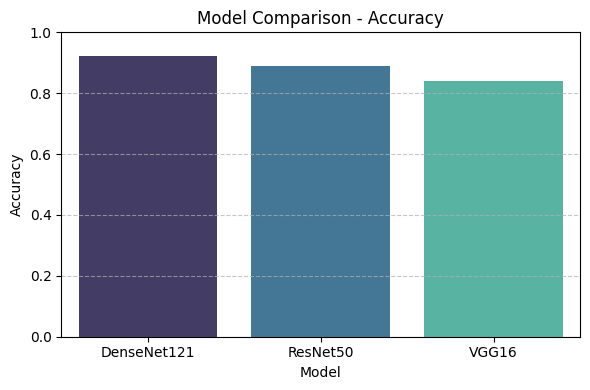

<ipython-input-3-928443657d28>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='mako')


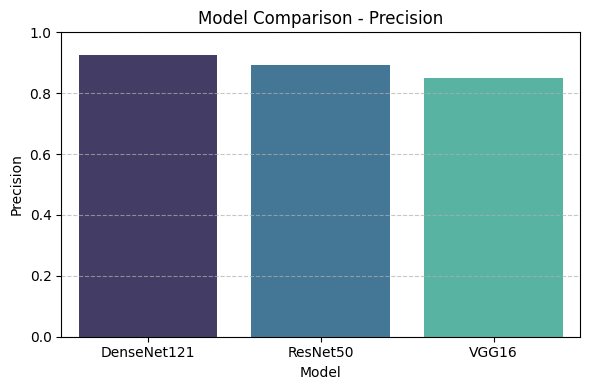

<ipython-input-3-928443657d28>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='mako')


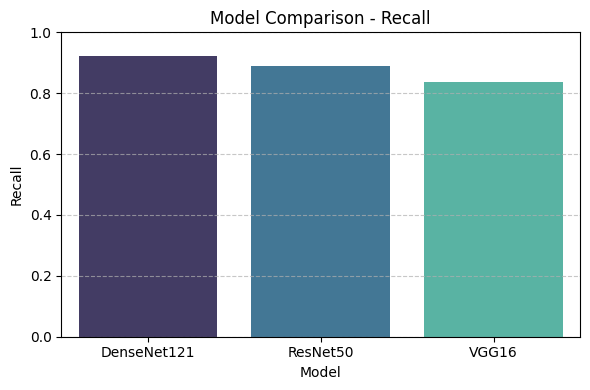

<ipython-input-3-928443657d28>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='mako')


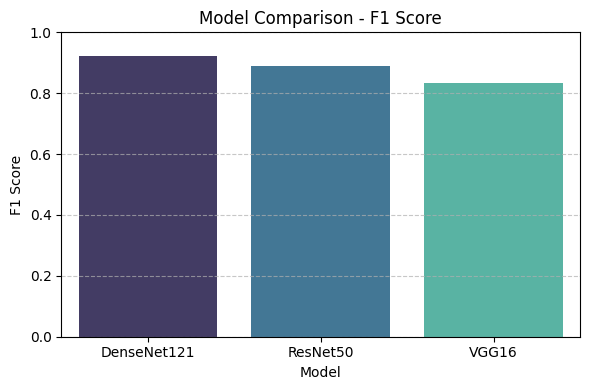

In [3]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset
data_dir = '/kaggle/input/eye-diseases-classification/dataset'
filepaths, labels = [], []
for folder in os.listdir(data_dir):
    for file in os.listdir(os.path.join(data_dir, folder)):
        filepaths.append(os.path.join(data_dir, folder, file))
        labels.append(folder)

df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

# Only test split (assuming training already done)
_, test_df = train_test_split(df, test_size=0.2, stratify=df['labels'], random_state=42)

# Test data generator (rescale only for inference)
test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    test_df, x_col='filepaths', y_col='labels',
    target_size=(224, 224), class_mode='categorical',
    batch_size=16, shuffle=False
)

# Dictionary to store metrics
model_metrics = {}

# Evaluation function
def evaluate_model(model_path, model_name):
    print(f"\n🔍 Loading model: {model_name}")
    model = load_model(model_path)

    print("📊 Evaluating on test data...")
    loss, acc = model.evaluate(test_gen, verbose=0)
    print(f"{model_name} Accuracy (from evaluate): {acc:.4f}, Loss: {loss:.4f}")

    print("📈 Generating predictions and report...")
    y_true = test_gen.classes
    class_names = list(test_gen.class_indices.keys())
    y_pred_probs = model.predict(test_gen)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Classification report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Summary metrics
    overall_accuracy = accuracy_score(y_true, y_pred)
    macro_precision = precision_score(y_true, y_pred, average='macro')
    macro_recall = recall_score(y_true, y_pred, average='macro')
    macro_f1 = f1_score(y_true, y_pred, average='macro')

    print(f"\n🔎 {model_name} - Overall Performance Metrics:")
    print(f"Accuracy:  {overall_accuracy:.4f}")
    print(f"Precision: {macro_precision:.4f}")
    print(f"Recall:    {macro_recall:.4f}")
    print(f"F1 Score:  {macro_f1:.4f}")

    # Save to dictionary for graphing
    model_metrics[model_name] = {
        'Accuracy': overall_accuracy,
        'Precision': macro_precision,
        'Recall': macro_recall,
        'F1 Score': macro_f1
    }

# Evaluate all models
evaluate_model('/content/drive/MyDrive/model/DenseNet121.h5', 'DenseNet121')
evaluate_model('/content/drive/MyDrive/model/ResNet50.h5', 'ResNet50')
evaluate_model('/content/drive/MyDrive/model/VGG16.h5', 'VGG16')

# Plot each metric in a separate bar chart
def plot_individual_metrics(metrics_dict):
    metrics_df = pd.DataFrame(metrics_dict).T  # Models as rows

    # Plot each metric separately
    for metric in metrics_df.columns:
        plt.figure(figsize=(6, 4))
        sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='mako')
        plt.title(f'Model Comparison - {metric}')
        plt.ylabel(metric)
        plt.ylim(0, 1)
        plt.xlabel('Model')
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Call the plotting function
plot_individual_metrics(model_metrics)
